In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns, numpy as np

In [ ]:
path="/content/gdrive/MyDrive/DE Project/"

In [ ]:
X = pickle.load(open(path + 'X.pkl','rb'))
y = pickle.load(open(path+ 'y.pkl','rb'))


In [ ]:
Z = pd.concat([X, y], axis=1, join='inner')
Z

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,20344,1,163,87.0,120,80,1,1,0,0,0,0
1,21910,1,158,63.0,140,70,3,1,0,0,1,1
2,16762,2,174,66.0,110,80,1,1,0,0,1,0
3,23119,1,161,68.0,120,80,1,1,0,0,1,1
4,21747,2,172,97.0,120,80,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,20418,2,178,129.0,140,90,3,3,0,0,1,1
69996,17979,1,161,69.0,120,80,1,1,0,0,1,0
69997,20679,1,164,82.0,120,80,3,3,0,0,0,0
69998,18122,1,164,64.0,120,70,1,1,0,0,1,0


In [ ]:
Z['age']=Z['age']/360

In [ ]:
healthy = Z[ Z['cardio'] == 0 ].index
Z.drop(healthy, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


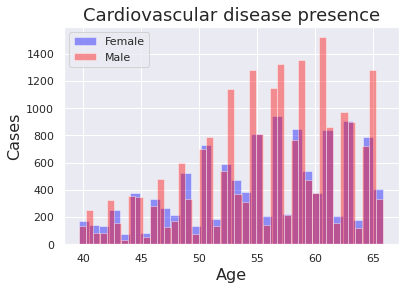

In [ ]:
df = Z[Z.gender==2]
sns.distplot(df['age'], label='Female', color ='blue', kde=False)
df = Z[Z.gender==1]
sns.distplot(df['age'], label='Male', color = 'red', kde=False)
#sns.distplot(Z['age'], color=(0.8, 1, 0.3, 1), kde_kws={"color":"lime","linestyle":"--"})
plt.title('Cardiovascular disease presence', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.legend()

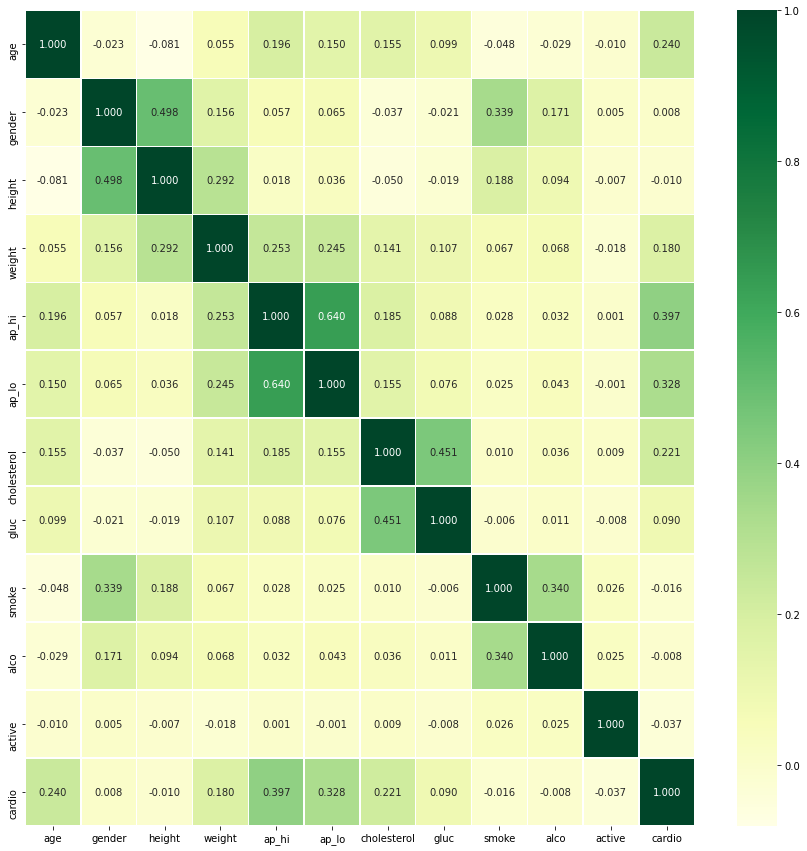

In [ ]:
x = pd.concat([X, y], axis=1, join='inner')
corr = x.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax, cmap="YlGn")